In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_human = {}
# 一行一行读取数据
for uid, line in enumerate(lines):
    # 去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]

In [2]:
with tf.gfile.FastGFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

Instructions for updating:
Use tf.gfile.GFile.


test_image/0574.jpg
[3 1 0 2]
houses (score = 0.96775)
flower (score = 0.01540)
airplane (score = 0.00931)
guitars (score = 0.00755)



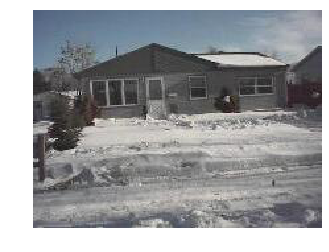

test_image/0575.jpg
[3 1 0 2]
houses (score = 0.98954)
flower (score = 0.00467)
airplane (score = 0.00365)
guitars (score = 0.00214)



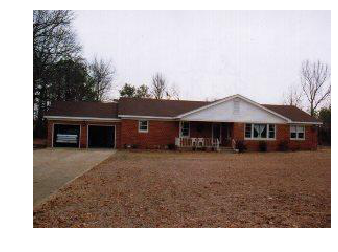

test_image/0576.jpg
[3 1 0 2]
houses (score = 0.98027)
flower (score = 0.00846)
airplane (score = 0.00671)
guitars (score = 0.00456)



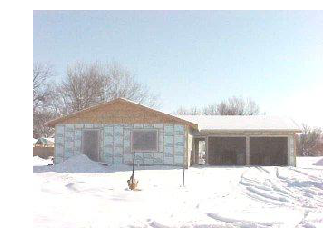

test_image/0577.jpg
[3 1 0 2]
houses (score = 0.95012)
flower (score = 0.02300)
airplane (score = 0.01381)
guitars (score = 0.01308)



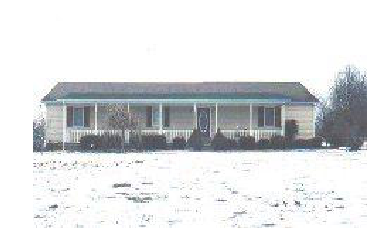

test_image/0578.jpg
[3 0 1 2]
houses (score = 0.95010)
airplane (score = 0.02387)
flower (score = 0.01617)
guitars (score = 0.00985)



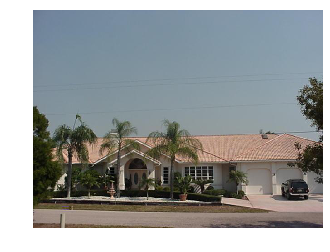

In [4]:
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    #遍历目录
    for root,dirs,files in os.walk('test_image/'):	#指定测试图片的位置
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据

            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)

            #排序
            top_k = predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:     
                #获取分类名称
                human_string = id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()